## Import the libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## 01 - Problem (case study)

### Data Description

In [34]:
# rhrthe rtreenr

### Goal

In [35]:
gagdegaergegr

NameError: name 'gagdegaergegr' is not defined

### Read the .csv file

In [36]:
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 03 - Cleaning/Wrangling/EDA

### Change headers names

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [69]:
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment_status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [70]:
#df.columns = [column.lower() for column in df.columns]
#df.head()

In [71]:
df = df.rename(columns = {"employmentstatus" : "employment_status"})
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment_status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [72]:
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Deal with NaN values

In [73]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Categorical Features

In [74]:
df_cat = df.select_dtypes(include = np.object)
df_cat

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Numerical Features

In [75]:
df_num = df.select_dtypes(include = np.number)
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154
...,...,...,...,...,...,...,...,...
9129,2.801170,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,23.588905
9130,2.711030,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,32.792951
9131,2.762062,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,47.263726
9132,2.758397,704.383672,0.685898,11.319628,1.667871,0.648045,0.893486,44.225147


### Exploration

In [76]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,2.746599,1142.172669,0.685694,6.168404,20.054770,0.617303,0.612203,32.964932
std,0.030655,301.077480,0.000407,3.173816,9.578330,0.273304,0.524594,11.762830
min,2.677981,437.840563,0.685064,0.000000,0.000000,0.000000,0.000000,-1.407655
25%,2.726129,924.588059,0.685316,3.561530,12.535528,0.648045,0.000000,27.740649
50%,2.745813,1167.961720,0.685688,6.450279,20.964768,0.648045,0.607328,32.998414
75%,2.766130,1327.672328,0.686049,8.711113,27.953390,0.648045,1.070748,39.399612
max,2.832791,1768.720501,0.686619,11.537190,35.813279,1.779382,1.475504,88.948535


In [77]:
df.describe().apply(lambda x: round(x, 2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,2.75,1142.17,0.69,6.17,20.05,0.62,0.61,32.96
std,0.03,301.08,0.00,3.17,9.58,0.27,0.52,11.76
min,2.68,437.84,0.69,0.00,0.00,0.00,0.00,-1.41
25%,2.73,924.59,0.69,3.56,12.54,0.65,0.00,27.74
50%,2.75,1167.96,0.69,6.45,20.96,0.65,0.61,33.00
75%,2.77,1327.67,0.69,8.71,27.95,0.65,1.07,39.40
max,2.83,1768.72,0.69,11.54,35.81,1.78,1.48,88.95


In [78]:
num = df.select_dtypes(np.number)
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154


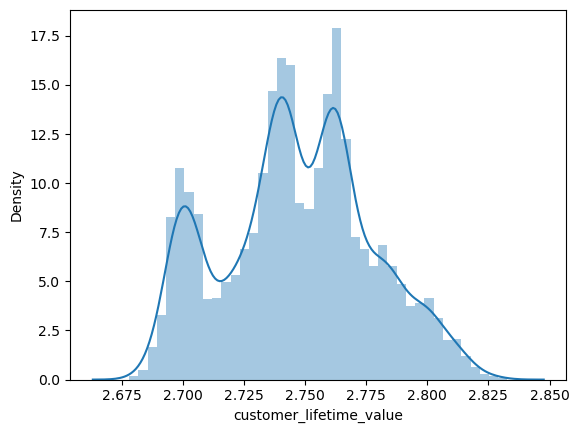

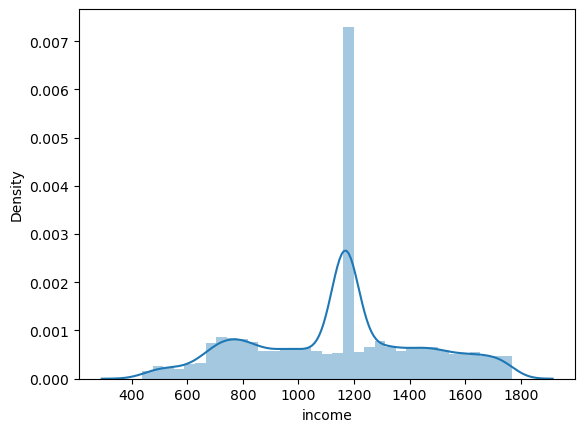

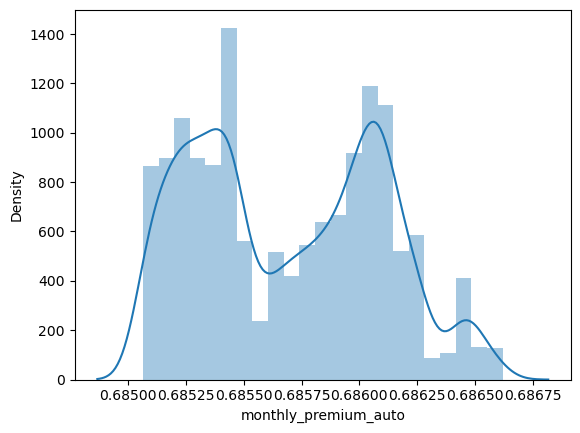

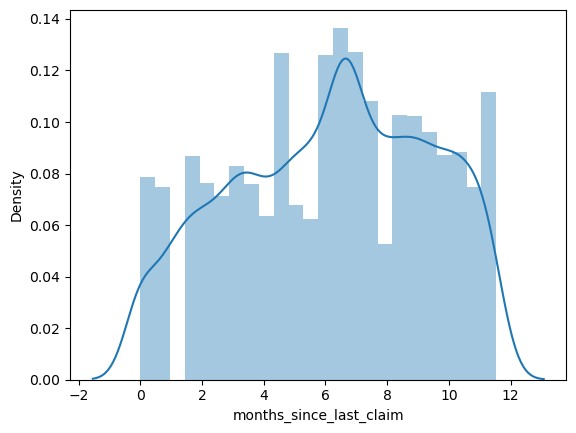

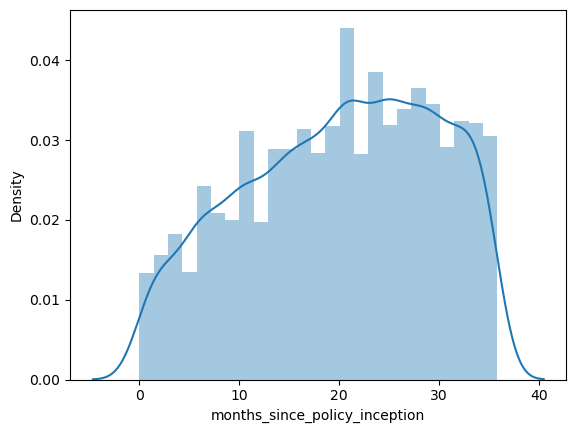

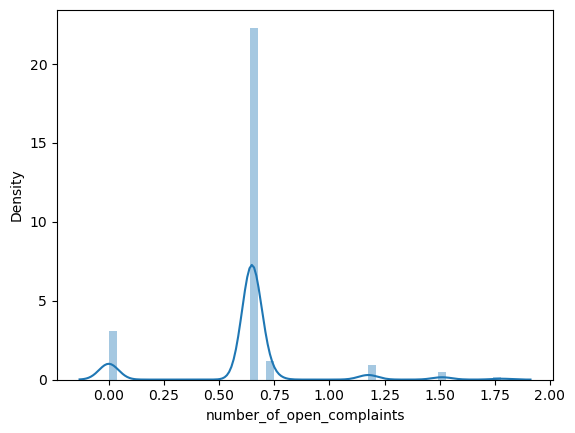

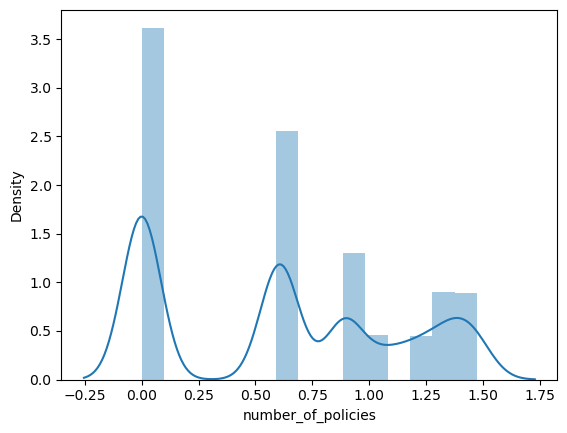

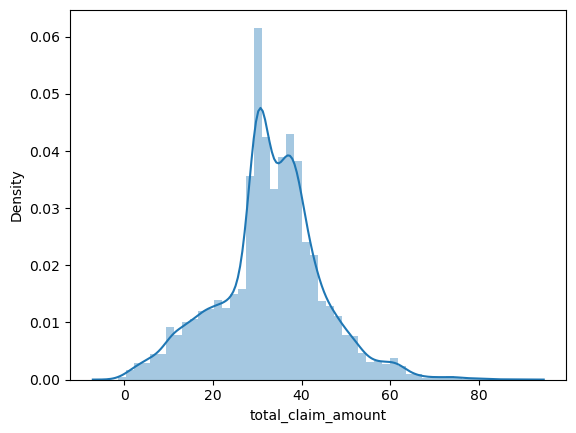

In [79]:
for column in num.columns:
    sns.distplot(df[column])
    plt.show()

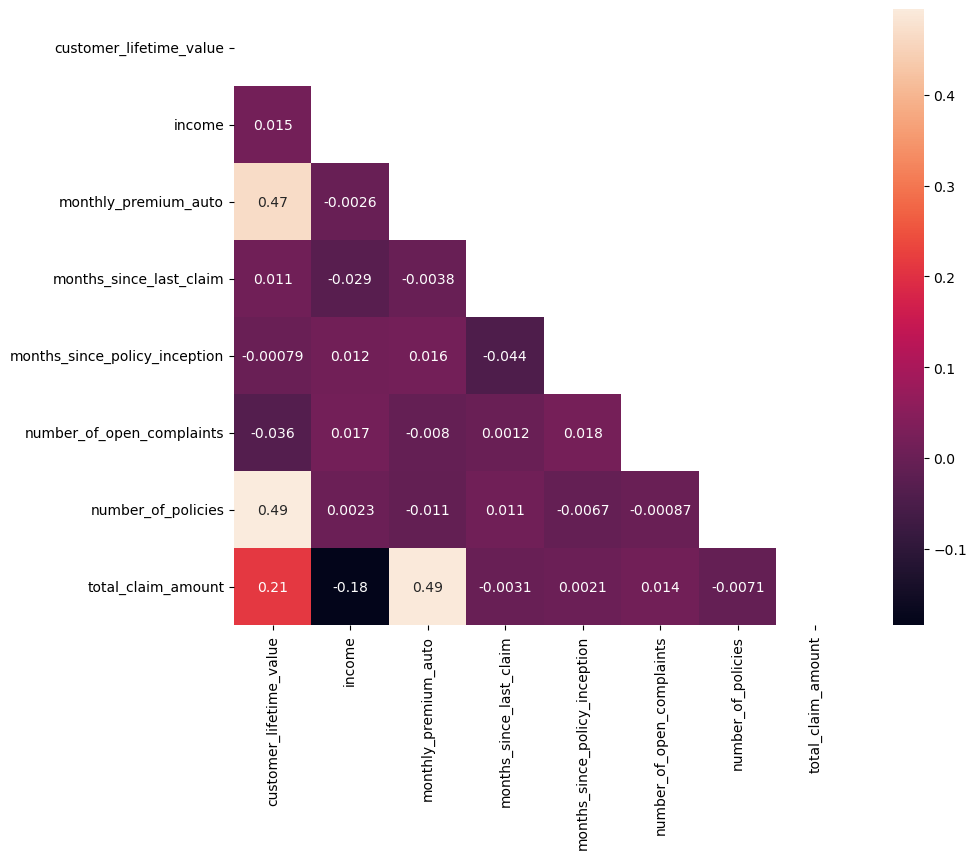

In [80]:
#use a heatmap to show the correlation, it is easier to visualise this way

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(df.corr(), mask = mask, annot = True)
plt.show()

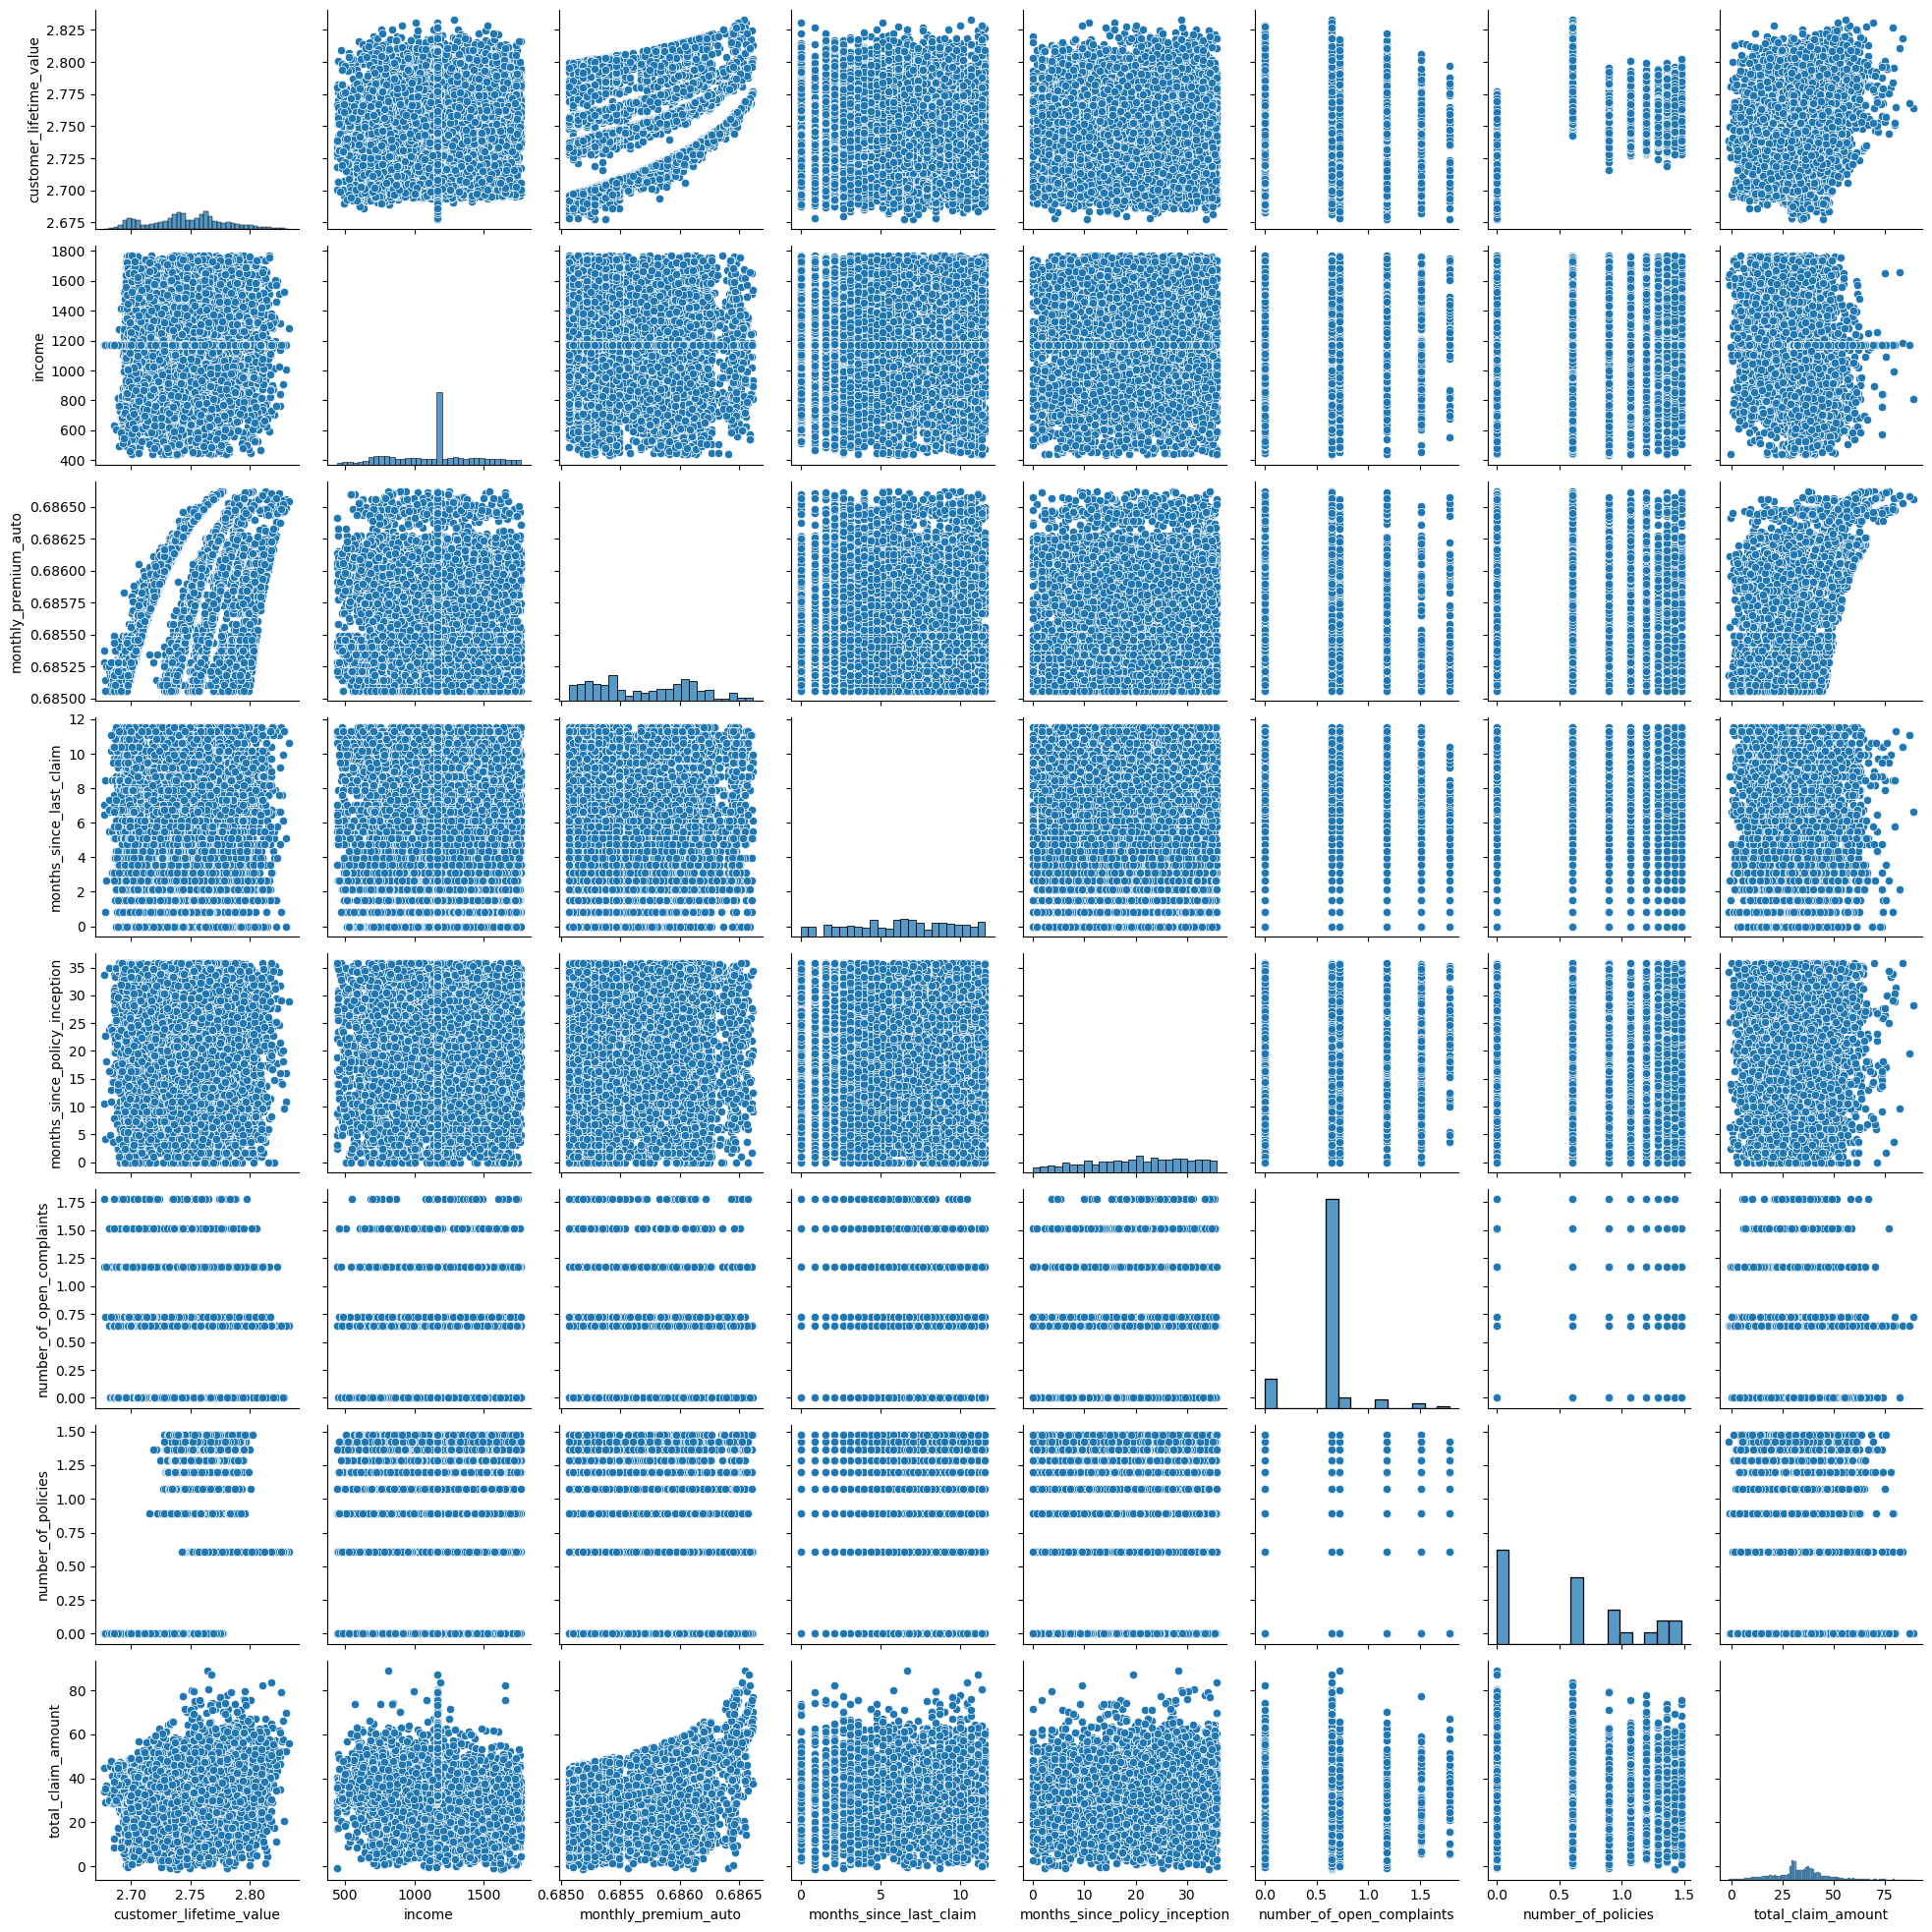

In [81]:
# a covarince correlation also show the correlations using visualisation

sns.pairplot(df)

In [82]:
# applying a boxcox transformation

df_trans = df.copy()

def boxcox_transform(df):
    numeric_cols = df_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df_trans[column] = np.where(df_trans[column] <= 0, np.NAN, df_trans[column])
        df_trans[column] = df_trans[column].fillna(df_trans[column].mean())
        transformed_data, ci = stats.boxcox(df_trans[column])
        df_trans[column] = transformed_data
        _ci[column] = [ci]
    return df, _ci
df, _ci = boxcox_transform(df_trans)
df_trans.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,0.688843,No,Basic,Bachelor,2/24/11,Employed,F,1245.725613,...,1.974649,-31.786898,-0.050447,Corporate Auto,Corporate L3,Offer1,Agent,30.939946,Two-Door Car,Medsize
1,QZ44356,Arizona,0.697309,No,Extended,Bachelor,1/31/11,Unemployed,F,1165.840139,...,16.585033,-31.786898,0.369142,Personal Auto,Personal L3,Offer3,Agent,53.109818,Four-Door Car,Medsize
2,AI49188,Nevada,0.701486,No,Premium,Bachelor,2/19/11,Employed,F,1141.968191,...,15.321697,-31.786898,-0.470049,Personal Auto,Personal L3,Offer1,Agent,37.645537,Two-Door Car,Medsize
3,WW63253,California,0.697993,No,Basic,Bachelor,1/20/11,Unemployed,M,1165.840139,...,23.239789,-31.786898,0.321830,Corporate Auto,Corporate L2,Offer1,Call Center,36.399737,SUV,Medsize
4,HB64268,Washington,0.689038,No,Basic,Bachelor,2/3/11,Employed,M,1070.360434,...,17.202529,-31.786898,-0.050447,Personal Auto,Personal L1,Offer1,Agent,18.038870,Four-Door Car,Medsize


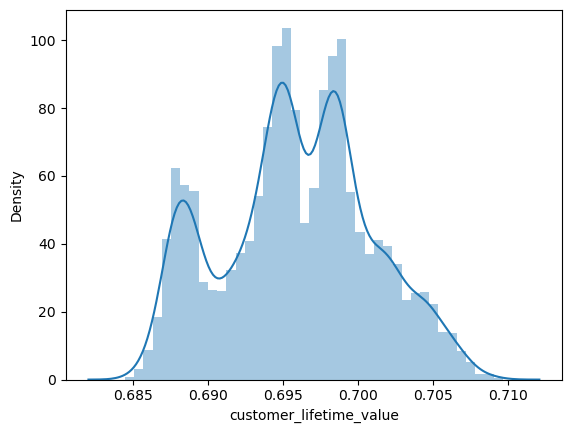

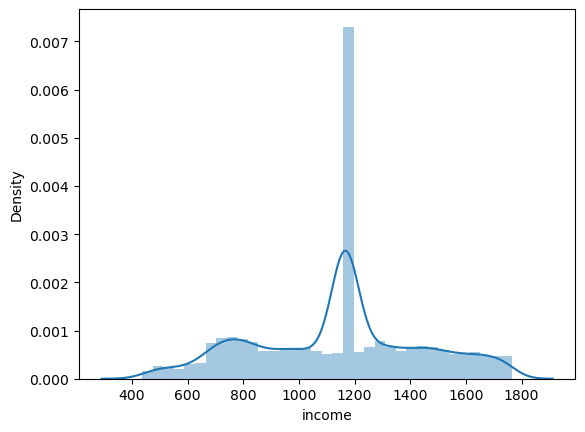

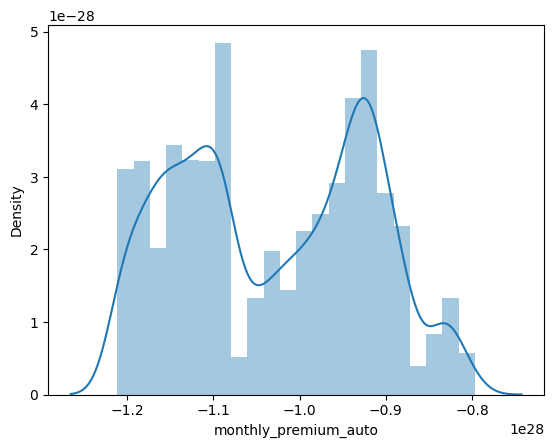

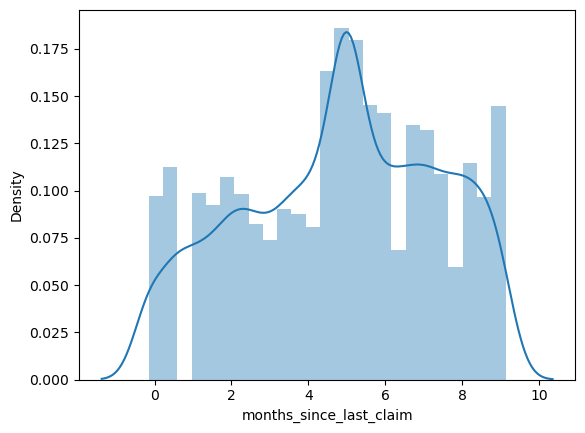

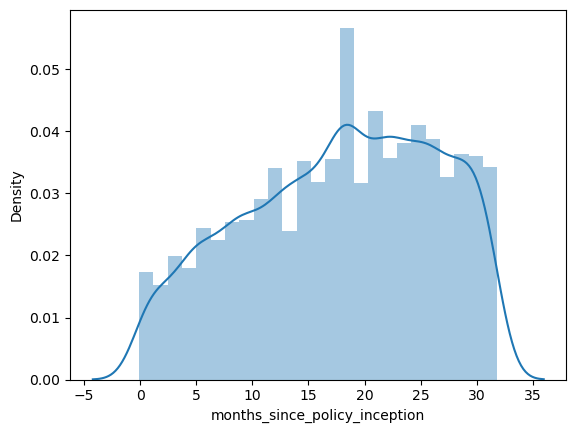

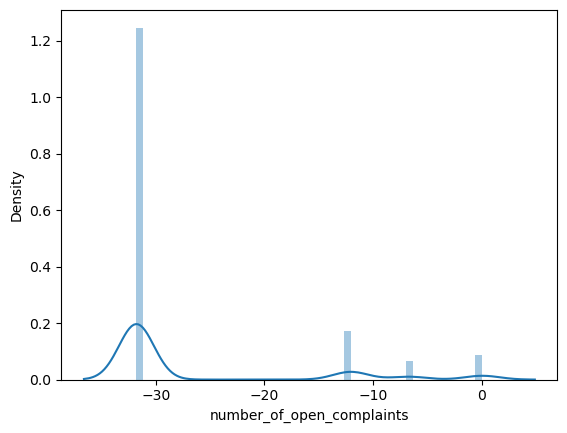

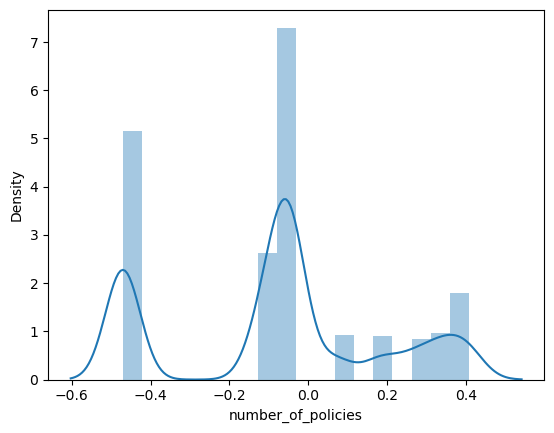

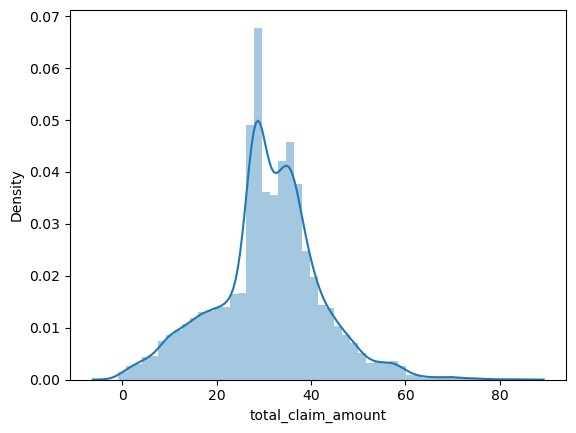

In [83]:
for column in df_trans.select_dtypes(np.number).columns:
    sns.distplot(df_trans[column])
    plt.show()

## 04 - Processing Data

### Dealing with outliers

In [84]:
def remove_outliers(df, threshold = 1.5, in_columns = df.select_dtypes(np.number).columns, skip_columns = []):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column], 75)
            lower = np.percentile(df[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column] > lower_limit) & (df[column] < upper_limit)]
    return df

In [92]:
df1 = df.copy()
df1 = remove_outliers(df1, threshold = 0, skip_columns = ["months_since_last_claim"])
df1

IndexError: index -1 is out of bounds for axis 0 with size 0

### Normalization

In [95]:
y = df["customer_lifetime_value"]
X = df.drop(["customer_lifetime_value"], axis = 1)
X.head()

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,1245.725613,Suburban,...,1.974649,-31.786898,-0.050447,Corporate Auto,Corporate L3,Offer1,Agent,30.939946,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,1165.840139,Suburban,...,16.585033,-31.786898,0.369142,Personal Auto,Personal L3,Offer3,Agent,53.109818,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,1141.968191,Suburban,...,15.321697,-31.786898,-0.470049,Personal Auto,Personal L3,Offer1,Agent,37.645537,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,1165.840139,Suburban,...,23.239789,-31.786898,0.321830,Corporate Auto,Corporate L2,Offer1,Call Center,36.399737,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,1070.360434,Rural,...,17.202529,-31.786898,-0.050447,Personal Auto,Personal L1,Offer1,Agent,18.038870,Four-Door Car,Medsize


In [97]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
X_num

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1245.725613,-1.122127e+28,8.587794,1.974649,-31.786898,-0.050447,30.939946
1,1165.840139,-9.745620e+27,4.365036,16.585033,-31.786898,0.369142,53.109818
2,1141.968191,-9.313425e+27,5.672909,15.321697,-31.786898,-0.470049,37.645537
3,1165.840139,-9.365593e+27,5.672909,23.239789,-31.786898,0.321830,36.399737
4,1070.360434,-1.088256e+28,4.075005,17.202529,-31.786898,-0.050447,18.038870
...,...,...,...,...,...,...,...
9129,1446.091117,-1.088256e+28,5.672909,29.429972,-31.786898,-0.470049,21.905574
9130,696.177309,-1.046702e+28,4.644216,11.963177,-31.786898,-0.050447,30.708229
9131,1165.840139,-1.013445e+28,3.123949,14.999490,0.063804,-0.470049,44.483386
9132,702.763582,-9.672968e+27,8.947829,0.661735,-31.786898,-0.111118,41.596240


In [101]:
transformer = MinMaxScaler().fit(X_num)
x_minmax = transformer.transform(X_num)
print(x_minmax.shape)

(9134, 7)


In [102]:
x_minmax

array([[0.60871574, 0.21510981, 0.94219257, ..., 0.        , 0.47804288,
        0.37484137],
       [0.54862517, 0.57097651, 0.48691856, ..., 0.        , 0.9560701 ,
        0.63659645],
       [0.53066848, 0.67520415, 0.62792608, ..., 0.        , 0.        ,
        0.45401289],
       ...,
       [0.54862517, 0.47720567, 0.3531116 , ..., 0.99977329, 0.        ,
        0.53474596],
       [0.20029486, 0.58849729, 0.9810095 , ..., 0.        , 0.40892108,
        0.50065802],
       [0.54862517, 0.36614713, 0.07196957, ..., 0.        , 0.47804288,
        0.36737416]])

In [103]:
X_num_norm = pd.DataFrame(x_minmax, columns = X_num.columns)
X_num_norm.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.608716,0.215110,0.942193,0.065035,0.0,0.478043,0.374841
1,0.548625,0.570977,0.486919,0.522268,0.0,0.956070,0.636596
2,0.530668,0.675204,0.627926,0.482732,0.0,0.000000,0.454013
3,0.548625,0.662623,0.627926,0.730530,0.0,0.902170,0.439304
4,0.476804,0.296792,0.455649,0.541593,0.0,0.478043,0.222521


<AxesSubplot:xlabel='income', ylabel='Density'>

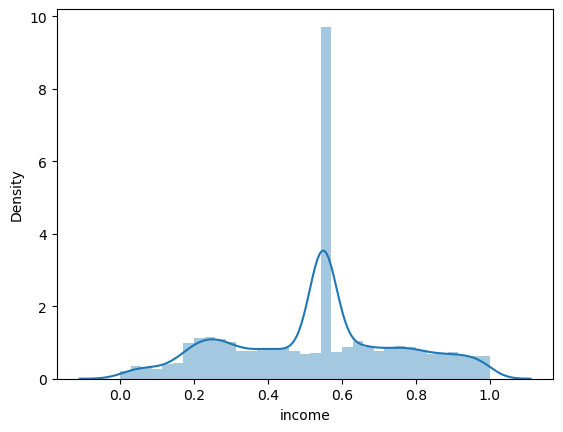

In [104]:
sns.distplot(X_num_norm["income"])

### Encoding Categorical Data

In [105]:
y = df["customer_lifetime_value"]
X = df.drop(["customer_lifetime_value"], axis=1)
X.head()

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,1245.725613,Suburban,...,1.974649,-31.786898,-0.050447,Corporate Auto,Corporate L3,Offer1,Agent,30.939946,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,1165.840139,Suburban,...,16.585033,-31.786898,0.369142,Personal Auto,Personal L3,Offer3,Agent,53.109818,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,1141.968191,Suburban,...,15.321697,-31.786898,-0.470049,Personal Auto,Personal L3,Offer1,Agent,37.645537,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,1165.840139,Suburban,...,23.239789,-31.786898,0.321830,Corporate Auto,Corporate L2,Offer1,Call Center,36.399737,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,1070.360434,Rural,...,17.202529,-31.786898,-0.050447,Personal Auto,Personal L1,Offer1,Agent,18.038870,Four-Door Car,Medsize


In [106]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = "object")
X_cat

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [107]:
X_cat = pd.get_dummies(X_cat, drop_first = False)
X_cat

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [109]:
X_num = X.select_dtypes(include = np.number)
X = pd.concat([X_num, X_cat], axis = 1)
X.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_AA10041,customer_AA11235,customer_AA16582,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,1245.725613,-1.122127e+28,8.587794,1.974649,-31.786898,-0.050447,30.939946,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1165.840139,-9.745620e+27,4.365036,16.585033,-31.786898,0.369142,53.109818,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1141.968191,-9.313425e+27,5.672909,15.321697,-31.786898,-0.470049,37.645537,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1165.840139,-9.365593e+27,5.672909,23.239789,-31.786898,0.321830,36.399737,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1070.360434,-1.088256e+28,4.075005,17.202529,-31.786898,-0.050447,18.038870,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Splitting into train set and test set

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Apply model

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
len(X)

9134

In [117]:
len(X_train)

6393

In [118]:
len(X_test)

2741

In [119]:
X_train.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_AA10041,customer_AA11235,customer_AA16582,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
434,1139.120995,-8.877912e+27,4.075005,6.946598,-31.786898,-0.050447,39.520079,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4641,795.070382,-8.862705e+27,1.557306,-0.103456,-31.786898,-0.050447,39.672228,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4952,508.668483,-8.751436e+27,0.516300,19.298429,-31.786898,-0.050447,40.867689,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1489,1165.840139,-9.030259e+27,1.557306,30.650208,-31.786898,0.369142,46.675483,0,0,0,...,0,0,0,0,0,1,0,0,1,0
812,1425.319938,-1.023760e+28,4.365036,8.598856,-12.041916,-0.050447,18.298111,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## 06 - Model Validation

In [123]:
#predictions
predictions = model.predict(X_test)
predictions.shape()

TypeError: 'tuple' object is not callable

In [124]:
predictions

array([0.69779466, 0.69437698, 0.69702117, ..., 0.69896391, 0.69437698,
       0.6986568 ])

In [125]:
y_test

708     0.693090
47      0.695431
3995    0.692118
1513    0.698246
3686    0.698261
          ...   
4271    0.693332
7923    0.699182
5633    0.695443
8432    0.694759
681     0.705767
Name: customer_lifetime_value, Length: 2741, dtype: float64

### R2

In [126]:
r2 = r2_score(y_test, predictions)

### MSE

In [127]:
MSE = mean_squared_error(y_test, predictions)

### RMSE

In [128]:
RMSE = mean_squared_error(y_test, predictions, squared = False)

In [129]:
print("r2 = ", r2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)

r2 =  0.22161837367395476
MSE =  2.0427922946859315e-05
RMSE =  0.004519725981390832


### MAE

## 07 - Reporting

### Present results